In [1]:
import torch

In [2]:
from torch import nn, optim
import torchvision
from torchvision import datasets, transforms

In [3]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)



In [4]:
model = nn.Sequential(nn.Linear(784, 128), nn.ReLU(), nn.Linear(128, 128), nn.ReLU(), nn.Linear(128, 10), nn.LogSoftmax(dim=1))
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)


In [11]:
epochs = 10
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)
        optimizer.zero_grad()
        output = model.forward(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 1.9038798787446418
Training loss: 0.8089508007902072
Training loss: 0.5033564670348981
Training loss: 0.4190176468827069
Training loss: 0.37895376155816163
Training loss: 0.3546028422918528
Training loss: 0.3380051120273721
Training loss: 0.32416532577069074
Training loss: 0.31299500636009775
Training loss: 0.30333574540388863


In [28]:
gradsimilarsum = 0
for i in range(1000):
    # Get a batch of images and labels
    dataiter = iter(trainloader)
    images, labels = next(dataiter)

    # Select the first two images
    images = images[:2]

    # Make sure the images require gradient computation
    images.requires_grad = True


    for param in model.parameters():
        param.grad = None
    # Forward pass
    outputs = model(images.view(images.shape[0], -1))

    # Compute the loss
    loss = criterion(outputs, labels[:2])


    # Backward pass from the loss
    loss.backward()

    # The gradient of the loss with respect to the images is now stored in `images.grad`
    for i, param in enumerate(model.parameters()):
    if i != 0:  # Skip the first weight matrix
        param.grad = None

    # The gradient of the loss with respect to the first weight matrix is now stored in `model[0].weight.grad`
    print(model[0].weight.grad)


    grad1 = images.grad[0].flatten()
    grad2 = images.grad[1].flatten()

    # Calculate the cosine of the angle between the gradients
    cos_theta = torch.dot(grad1, grad2) / (grad1.norm() * grad2.norm())

    import numpy as np
    print(np.arccos(cos_theta))
    gradsimilarsum += cos_theta

print(gradsimilarsum/1000)

tensor(1.4473)
tensor(1.5396)
tensor(1.0072)
tensor(1.6109)
tensor(1.5235)
tensor(1.4786)
tensor(1.4338)
tensor(1.7368)
tensor(1.3385)
tensor(1.1031)
tensor(1.4730)
tensor(2.1605)
tensor(0.6014)
tensor(1.6672)
tensor(1.5381)
tensor(1.6750)
tensor(2.1693)
tensor(0.7145)
tensor(1.5834)
tensor(2.0455)
tensor(1.4113)
tensor(1.7779)
tensor(1.6848)
tensor(1.2912)
tensor(1.4487)
tensor(1.6174)
tensor(1.7020)
tensor(1.4471)
tensor(1.7368)
tensor(1.5161)
tensor(1.3387)
tensor(1.8869)
tensor(1.1843)
tensor(0.9030)
tensor(1.2797)
tensor(1.5973)
tensor(1.5529)
tensor(2.2353)
tensor(1.3589)
tensor(1.5633)
tensor(1.7707)
tensor(1.7943)
tensor(1.5351)
tensor(1.1112)
tensor(1.1003)
tensor(1.6638)
tensor(1.1002)
tensor(1.3346)
tensor(1.8078)
tensor(0.8811)
tensor(1.6416)
tensor(1.8552)
tensor(1.2926)
tensor(1.1474)
tensor(1.2047)
tensor(2.7472)
tensor(1.1089)
tensor(1.3701)
tensor(1.7128)
tensor(0.9178)
tensor(0.2153)
tensor(1.3397)
tensor(1.9820)
tensor(2.4625)
tensor(1.8859)
tensor(1.9754)
tensor(1.6

In [69]:
correct = 0
total = 0
with torch.no_grad():
    for data in trainloader:
        images, labels = data
        images = images.view(images.shape[0], -1)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the MNIST images: %d %%' % (100 * correct / total))

Accuracy of the network on the MNIST images: 98 %


In [55]:
print(model[4].weight[0])


tensor([ 0.0141,  0.0249, -0.0261,  0.0234,  0.0770, -0.0089, -0.0094,  0.0564,
         0.0429,  0.0763, -0.0822, -0.0057,  0.0786, -0.0046,  0.0505,  0.0685,
         0.0302,  0.0342,  0.0795, -0.0053, -0.0778,  0.0535,  0.0232,  0.0393,
        -0.0400,  0.0345, -0.0084, -0.0701,  0.0253,  0.0590,  0.0279,  0.0558,
        -0.0234,  0.0850,  0.0549, -0.0092, -0.0049,  0.0250, -0.0293,  0.0196,
         0.0806, -0.0774, -0.0842,  0.0095, -0.0533, -0.0578,  0.0043, -0.0841,
        -0.0788, -0.0138, -0.0849,  0.0452, -0.0492,  0.0366,  0.0328,  0.0515,
        -0.0652,  0.0434,  0.0676, -0.0823,  0.0244, -0.0605, -0.0237,  0.0662,
         0.0005, -0.0786,  0.0071,  0.0836, -0.0132,  0.0642, -0.0510,  0.0389,
         0.0196, -0.0815,  0.0061,  0.0611, -0.0264, -0.0248,  0.0173,  0.0132,
         0.0792,  0.0265,  0.0733,  0.0241,  0.0293,  0.0329,  0.0823, -0.0612,
        -0.0086, -0.0329,  0.0488,  0.0639,  0.0656,  0.0185,  0.0784,  0.0575,
        -0.0719, -0.0827,  0.0218, -0.05

In [10]:
def print_accuracy(model):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    correct = 0
    total = 0
    with torch.no_grad():
        k = 0
        for data in trainloader:
            k += 1
            if k > 5:
                break
            images, labels = data
            images = images.view(images.shape[0], -1)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the MNIST images: %d %%' % (100 * correct / total))

In [9]:
def update_biases(input_model, layer, alpha):
    bias_guesses = []
    losses = []
    bias_guesses.append(0 * torch.randn(input_model[layer].bias.shape))
    for i in range(49):
        # create random matrix of the same size as the layer
        bias_guesses.append(alpha * torch.randn(input_model[layer].bias.shape))
    for i in range(50):
        loss_sum = 0
        # add the matrix to the model
        input_model[layer].bias.data.add_(bias_guesses[i])
        correct = 0
        total = 0
        k = 0
        for j in range(2):
            data = next(iter(trainloader))
            images, labels = data
            images = images.view(images.shape[0], -1)
            outputs = input_model(images)
            loss_sum += criterion(outputs, labels).item()
        losses.append(loss_sum / 2)  # Append the average loss
        input_model[layer].bias.data.add_(-bias_guesses[i])


    minindex = losses.index(min(losses))
    input_model[layer].bias.data.add_(bias_guesses[minindex])

In [14]:
#model with absolutely random weight perturbations

model2 = nn.Sequential(nn.Linear(784, 128), nn.ReLU(), nn.Linear(128, 128), nn.ReLU(), nn.Linear(128, 10), nn.LogSoftmax(dim=1))
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# so basically weights[0] is 784 x 128 matrix, weights[2] is 128 x 128 matrix, weights[4] is 128 x 10 matrix

# make a 100 random 784 x 128 matrices

# try the model with each of these random matrices

# na jo az nagyon lassu lesz, de legalabb mukodik

# to do: configure learning rate



def update_row(input_model, layer, alpha):
    losses = []
    rand_weights = []
    rand_weights.append(0 * torch.randn(input_model[layer].weight.shape))
    for i in range(49):
        # create random matrix of the same size as the layer
        rand_weights.append(alpha * torch.randn(input_model[layer].weight.shape))
    for i in range(50):
        # add the matrix to the model

        # images, labels = next(iter(trainloader))
        # images = images.view(images.shape[0], -1)

        # output = input_model(images[0].view(1, -1))

        # criterion = nn.NLLLoss()
        # loss = criterion(output, labels[0].view(1))
        # loss.backward()
        # gradient = input_model[layer].weight.grad
        

        # #compute cosine similarity
        # grad1 = gradient.flatten()
        # grad2 = rand_weights[i].flatten()

        # # Calculate the cosine of the angle between the gradients
        # cos_theta = torch.dot(grad1, grad2) / (grad1.norm() * grad2.norm())
        # print(cos_theta)
        # print(grad2.norm())



        input_model[layer].weight.data.add_(rand_weights[i])
        # on a mini batch of 64 images, calculate the loss
        loss_sum = 0
        for j in range(2):
            data = next(iter(trainloader))
            images, labels = data
            images = images.view(images.shape[0], -1)
            outputs = input_model(images)
            loss_sum += criterion(outputs, labels).item()
        losses.append(loss_sum / 2)  # Append the average loss






        input_model[layer].weight.data.add_(-rand_weights[i])

    #choose the best one and add it to the network
    best = losses.index(min(losses))
    input_model[layer].weight.data.add_(rand_weights[best])

for i in range(100000):
    update_row(model2, 0, .4/((i+1)**.2))
    # update_biases(model2, 0, .4/((i+1)**.2))
    update_row(model2, 2, .4/((i+1)**.2))
    # update_biases(model2, 2, .4/((i+1)**.2))
    update_row(model2, 4, .4/((i+1)**.2))
    # update_biases(model2, 4, .4/((i+1)**.2))
    if i % 10 == 0:
        print_accuracy(model2)

Accuracy of the network on the MNIST images: 9 %
Accuracy of the network on the MNIST images: 8 %
Accuracy of the network on the MNIST images: 19 %
Accuracy of the network on the MNIST images: 21 %
Accuracy of the network on the MNIST images: 21 %
Accuracy of the network on the MNIST images: 18 %
Accuracy of the network on the MNIST images: 21 %
Accuracy of the network on the MNIST images: 20 %
Accuracy of the network on the MNIST images: 21 %
Accuracy of the network on the MNIST images: 25 %
Accuracy of the network on the MNIST images: 21 %
Accuracy of the network on the MNIST images: 21 %
Accuracy of the network on the MNIST images: 21 %


KeyboardInterrupt: 

In [39]:
print(torch.cuda.get_device_name(torch.cuda.current_device()))

NVIDIA GeForce RTX 2060 with Max-Q Design


In [1]:
import numpy as np
import ipdb


def compare_gradients():

    sample_size = 10

    avg_cos_normal = 0
    print("cosine similarity with random guessing")
    for i in range(sample_size):
        images, labels = next(iter(trainloader))
        images = images.view(images.shape[0], -1)

        images.requires_grad = True
        model.zero_grad()
        outputs = model(images)
        criterion = nn.NLLLoss()
        loss = criterion(outputs, labels)
        loss.backward()
        grad1 = model[0].weight.grad.flatten()
        print(grad1.shape)


        grad2 = torch.randn(model[0].weight.shape).flatten()
        cos_theta = torch.dot(grad1, grad2) / (grad1.norm() * grad2.norm())
        avg_cos_normal += abs(cos_theta)


    #cosine similarity with W_t
    avg_cos_wt = 0    
    for i in range(sample_size):
        layer = 2
        images, labels = next(iter(trainloader))
        images = images.view(images.shape[0], -1)
        images.requires_grad = True



        model.zero_grad()
        outputs = model(images)
        criterion = nn.NLLLoss()
        loss = criterion(outputs, labels)
        loss.backward()
        grad1 = model[layer].weight.grad.flatten()




        
        def get_input(layer):
            def hook(module, input, output):
                # input is a tuple, to get the actual input tensor, use input[0]
                layer.input = input[0]
            return hook

        # Attach the hook to the 2nd layer (index 1 if 0-based indexing)
        hook = model[layer].register_forward_hook(get_input(model[layer]))

        output = model(images)

        # Now you can access both the input and output of the layer
        x_i = model[layer].input
        w_i = model[layer].weight
        w_iplus1 = model[layer+2].weight
        x_i_matrix = x_i[0].view(x_i[0].shape[0],-1)
        s_i = torch.mm(w_i, x_i_matrix)



        deltaReLU = torch.diag((s_i.flatten() > 0).float())
        

        intermed1 = torch.mm(torch.randn(1, model[layer+2].out_features), w_iplus1)
        intermed2 = torch.mm(intermed1, deltaReLU)

        grad2 = torch.mm(intermed2.t(), x_i_matrix.t())


        grad2 = grad2.flatten()

        

        cos_theta = torch.dot(grad1, grad2) / (grad1.norm() * grad2.norm())

        avg_cos_wt += abs(cos_theta)


    print(avg_cos_normal/sample_size)
    print(avg_cos_wt/sample_size)

compare_gradients() 



cosine similarity with random guessing


NameError: name 'trainloader' is not defined

In [81]:

model3 = nn.Sequential(nn.Linear(784, 128), nn.ReLU(), nn.Linear(128, 128), nn.ReLU(), nn.Linear(128, 10), nn.LogSoftmax(dim=1))


def update_weights_smart(input_model, layer, alpha):
    si_size = 0
    if layer == 0:
        si_size = 128
    elif layer == 2:
        si_size = 10
    elif layer == 4:
        si_size = 10
    losses = []
    gradient_guesses = []
    gradient_guesses.append(0 * torch.randn(1, si_size))
    weight_perturbation_list = []
    # avg_cos_similarity = 0
    for i in range(49):
        # create random matrix of the same size as the layer
        gradient_guesses.append(alpha * torch.randn(1, si_size))
    for i in range(50):


        images, labels = next(iter(trainloader))
        images = images.view(images.shape[0], -1)
        # image = images[0]
        # image = image.view(1, -1)

        
        def get_input(layer):
            def hook(module, input, output):
                # input is a tuple, to get the actual input tensor, use input[0]
                layer.input = input[0]
                # layer.input = sum(input)/len(input)
            return hook

        # Attach the hook to the 2nd layer (index 1 if 0-based indexing)
        hook = input_model[layer].register_forward_hook(get_input(input_model[layer]))

        output = input_model(images)


        # # # compute the actual gradient
        # criterion = nn.NLLLoss()
        # loss = criterion(output, labels)
        # loss.backward()
        # gradient = input_model[layer].weight.grad


        # Now you can access both the input and output of the layer
        if layer == 0 or layer == 2:
            x_i = input_model[layer].input
            w_i = input_model[layer].weight
            w_iplus1 = input_model[layer+2].weight
            x_i_matrix = x_i[0].view(x_i[0].shape[0],-1)
            bias_vector = input_model[layer].bias
            s_i = torch.mm(w_i, x_i_matrix)
            bias = bias_vector.view(s_i.shape)
            s_i = s_i + bias

            deltaReLU = torch.diag((s_i.flatten() > 0).float())
            intermed1 = torch.mm(gradient_guesses[i], w_iplus1)
            intermed2 = torch.mm(intermed1, deltaReLU)
            weight_perturbation = torch.mm(intermed2.t(), x_i_matrix.t())

        if layer == 4:
            x_i = input_model[layer].input
            w_i = input_model[layer].weight
            x_i_matrix = x_i[0].view(x_i[0].shape[0],-1)
            bias_vector = input_model[layer].bias
            s_i = torch.mm(w_i, x_i_matrix)
            bias = bias_vector.view(s_i.shape)
            s_i = s_i + bias
            deltaReLU = torch.diag((s_i.flatten() > 0).float())
            intermed1 = torch.mm(gradient_guesses[i], deltaReLU)
            weight_perturbation = torch.mm(intermed1.t(), x_i_matrix.t())

        weight_perturbation_list.append(weight_perturbation)

        # compute cosine similarity 
        # grad1 = gradient.flatten()
        # grad2 = weight_perturbation.flatten()
        # cos_theta = torch.dot(grad1, grad2) / (grad1.norm() * grad2.norm())
        


        

        input_model[layer].weight.data.add_(weight_perturbation)
        loss_sum = 0
        for j in range(2):
            data = next(iter(trainloader))
            images, labels = data
            images = images.view(images.shape[0], -1)
            outputs = input_model(images)
            loss_sum += criterion(outputs, labels).item()
        losses.append(loss_sum/2)  # Append the average loss
        input_model[layer].weight.data.add_(-weight_perturbation)

        hook.remove()
    #choose the best one and add it to the network
        
    best = losses.index(min(losses))
    input_model[layer].weight.data.add_(weight_perturbation_list[best])




for i in range(2000):
    update_weights_smart(model3, 0, .4/((i+1)**.2))
    #update_biases(model3, 0, .1/((i+1)**.2))
    update_weights_smart(model3, 2, .4/((i+1)**.2))
    #update_biases(model3, 2, .1/((i+1)**.2))
    update_weights_smart(model3, 4, .4/((i+1)**.2))
    #update_biases(model3, 4, .1/((i+1)**.2))
    print(i)
    if i % 10 == 0:
        print_accuracy(model3)

0
Accuracy of the network on the MNIST images: 12 %
1
2
3
4
5
6
7
8
9
10
Accuracy of the network on the MNIST images: 11 %
11
12
13
14
15
16
17
18
19
20
Accuracy of the network on the MNIST images: 13 %
21
22
23
24
25
26
27
28
29
30
Accuracy of the network on the MNIST images: 6 %
31
32
33
34
35
36
37
38
39
40
Accuracy of the network on the MNIST images: 14 %
41
42
43
44
45
46
47
48
49
50
Accuracy of the network on the MNIST images: 9 %
51
52
53
54
55
56
57
58
59
60
Accuracy of the network on the MNIST images: 8 %
61
62
63
64
65


KeyboardInterrupt: 

In [64]:
# check bias cosine similarity
import numpy as np


def get_bias_gradients_matrix(input_model):
    # Ensure model is in training mode
    input_model.train()

    # Initialize a matrix to store the gradients
    gradients_matrix = []

    # Get a batch of 64 images
    for i in range(10):
        images, labels = next(iter(trainloader))
        images = images.view(images.shape[0], -1)

        for i in range(images.shape[0]):
            # Zero the gradients
            input_model.zero_grad()

            # Forward pass for one image at a time
            output = input_model(images[i].unsqueeze(0))

            # Compute loss
            loss = criterion(output, labels[i].unsqueeze(0))

            # Backward pass
            loss.backward()

            # Get the gradients of the biases of the first layer and add them to the matrix
            gradients_matrix.append(input_model[4].bias.grad.view(-1).detach().numpy())

        # input_model.zero_grad()
        # outputs = input_model(images)
        # criterion = nn.NLLLoss()
        # loss = criterion(outputs, labels)
        # loss.backward()
        # gradients_matrix.append(input_model[2].bias.grad.view(-1).detach().numpy())


    return np.array(gradients_matrix)



def effective_rank(matrix, tolerance=1e-8):
    # print size of array
    print(matrix.shape)


    # Compute SVD
    u, s, vh = np.linalg.svd(matrix)

    print(s)

    # Count singular values that are not close to zero
    rank = np.sum(s > tolerance)

    return rank

# Usage:
matrix = get_bias_gradients_matrix(model3)
rank = effective_rank(matrix)
print('Effective rank:', rank)

(640, 10)
[8.7495718e+00 8.4884481e+00 8.0213404e+00 7.9393139e+00 7.9024944e+00
 7.7789826e+00 7.6357222e+00 7.0931702e+00 6.3491158e+00 7.1567416e-07]
Effective rank: 10


Predicted Digit = 3
Actual Digit = 3


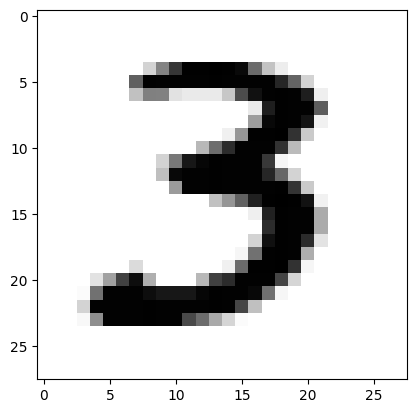

In [64]:
import matplotlib.pyplot as plt

# Assuming you have a DataLoader `trainloader` and a trained model `model`
dataiter = iter(trainloader)
images, labels = next(dataiter)
# Take the first image from the batch
img = images[0]

# Convert the image data into a format that can be input into the model
img = img.resize_(1, 784)

# Make a forward pass through the model and get the predictions
with torch.no_grad():
    logps = model(img)

# Convert the log probabilities to probabilities
ps = torch.exp(logps)
probab = list(ps.numpy()[0])

# Print the image and the model's prediction
print("Predicted Digit =", probab.index(max(probab)))
print("Actual Digit =", labels[0].item())
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r');